# Applied Data Science - Tesco Dataset Analysis
## An Analysis on drinking habits in London

### Task 1: Describe the Dataset


In [1]:
import numpy as np
import pandas as pd
import os

# Need to import all csvs and include the name 

csv_files = [file for file in os.listdir('csvs')]

dfs = []

for csv_file in csv_files:
    if 'year' in csv_file and 'borough' in csv_file:  
        # Read the CSV file into a DataFrame
        df = pd.read_csv(os.path.join('csvs/',csv_file))
        
        # Extract the month and area
        #month = csv_file.split('_')[0]  
        
        # Add a new column with the month
        #df['Month'] = month
        
        # Append the DataFrame to the list
        dfs.append(df)

tesco_data = pd.concat(dfs, ignore_index=True)

## Background

Tesco is the largest retailer.

Data is collected from those using the rewards, the Tesco Clubcard. The Tesco Grocery 1.0 Dataset provides a comprehensive view of grocery purchasing behavior across the London boroughs. The dataset contains transactional data from Tesco stores, along with demographic and geographical information for each clubcard user. For the case of this project, the data is aggregated at the borough level, allowing for analysis and comparison of grocery consumption patterns across different areas of London.

## Summary of Data

The data is extensive, and this each category is not spoken about explicitly. However basic summary statistics are:

In [2]:
print("Number of rows:", len(tesco_data))
print("Number of columns:", len(tesco_data.columns))

print("Number of missing values:", tesco_data.isnull().sum().sum())

Number of rows: 33
Number of columns: 202
Number of missing values: 0


- The number of rows coincides with our theoretical knowledge of the 33 boroughs.
- There are 202 columns, which will be summarised for the simplicity purposes.
- There are no missing values, therefore the data is complete. 


As noted, the dataset contains 202 columns which cannot all be used. To understand more about the data, we view it:

In [3]:
tesco_data.head(5)

,area_id,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,...,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km
0,E09000001,323.174750,35.0,150.0,250.0,400.0,1000.0,323.692596,1.001520,98.842963,...,103883,6687.0,3697.0,2990.0,1018.0,4349.0,1320.0,43.910124,2.90,2305.862069
1,E09000002,421.304125,32.5,165.6,300.0,500.0,1500.0,597.994271,0.828993,122.341294,...,397127,203101.0,99442.0,103659.0,60281.0,123180.0,19640.0,33.017321,36.09,5627.625381
2,E09000003,407.170491,40.0,180.0,320.0,500.0,1160.0,443.644324,0.171615,114.933771,...,4131210,378778.0,186357.0,192421.0,88754.0,237036.0,52988.0,37.195582,86.76,4365.813739
3,E09000004,359.544126,30.0,144.0,255.0,450.0,1000.0,476.576945,0.819748,106.446426,...,380177,242387.0,116814.0,125573.0,56028.0,146237.0,40122.0,38.880749,60.58,4001.105976
4,E09000005,434.324141,40.0,175.0,325.0,500.0,1500.0,616.087316,0.354492,128.930369,...,2541113,323443.0,163939.0,159504.0,75033.0,211885.0,36525.0,35.766416,43.28,7473.267098


The dataset is thorough and includes summary statistics of each variable like the percentile of each variable, the standard deviation and the 95% confidence intervals.
 
The different variables (which have already been summarised) can be divided into several main categories of variables:


1) Product Characteristics: Variables such as weight, volume, energy, energy_density, and various nutrient measures (carbs, sugar, fat, saturated_fat, protein, fibre) provide insights into the nutritional composition and physical attributes of the purchased products. These variables enable analysis of the healthiness and nutritional quality of grocery purchases in each borough.
2) Nutritional Diversity: Variables like h_nutrients_weight, h_nutrients_weight_norm, h_nutrients_calories, and h_nutrients_calories_norm capture the diversity and balance of nutrients in the purchased products. These measures allow for understanding the variety and distribution of nutrients consumed across boroughs.
3) Product Categories: The dataset includes variables representing the proportion of purchases in different product categories, such as f_beer, f_dairy, f_eggs, f_fats_oils, f_fish, f_fruit_veg, f_grains, f_red_meat, f_poultry, f_readymade, f_sauces, f_soft_drinks, f_spirits, f_sweets, f_tea_coffee, f_water, and f_wine. These variables provide insights into the types of products consumed in each borough and enable analysis of consumption patterns across different food and beverage categories.
4) Demographic Information: Variables such as population, male, female, age_0_17, age_18_64, age_65+, and avg_age provide demographic data for each borough. The avg_age variable, in particular, represents the average age of residents in each borough. These variables allow for exploring the relationship between grocery purchasing behaviour and demographic characteristics, such as age distribution and gender composition.
5) Geographical Data: Variables like area_sq_km and people_per_sq_km provide information about the geographical size and population density of each borough. These variables enable analysis of the spatial patterns and variations in grocery purchasing behaviour across London.

The possibility of insights gained are nearly endless, and thus dependent on what one is interested in to investigate. For example, one could analyse the relationship between population density and the consumption of fresh fruits and vegetables or ready-made meals.

For the purposes of this project, I will investigate the disposable income in age, by means of alcohol and ready made meals.

### Limitations:
- The Tesco Grocery 1.0 Dataset only covers purchases made at Tesco stores and does not include food consumption in restaurants or purchases made at other grocery chains or stores.
- The dataset does not include information on online purchases or purchases made by customers who do not own a Clubcard, limiting the scope of the data.
- The nutrient values provided in the dataset are averages over all the items purchased by the residents of an area, representing the nutritional features of a hypothetical average product consumed in the area. This limits the ability to estimate individual diets.

### Assumptions:
- It is assumed that the large sample size of Clubcard owners, despite not being a random sample, can still provide valuable insights into food consumption habits at the area level.
- The dataset assumes that the purchasing patterns of Clubcard owners are representative of the general shopping behavior within each area, although this may not always be the case.

### Biases:
- Selection bias: The dataset is based on a self-selected group of people who chose to shop at Tesco and opted for a Clubcard subscription. This group may not be representative of the overall population in terms of demographics, socio-economic factors, or spatial distribution.
- Geographical bias: Tesco stores have a higher concentration in the northern part of London, resulting in lower penetration in some areas of the city. This uneven coverage may introduce biases in the data, as certain areas may be underrepresented.
- Socio-economic bias: The dataset may overrepresent or underrepresent certain socio-economic groups based on their likelihood to shop at Tesco and own a Clubcard. This bias can affect the generalisability of the findings to the entire population of London.

### Task 2: Visualise the Dataset

The next task involves visualising the dataset and drawing two insights.

Upon reviewing the data available, and the overall direction this project is heading, I have chosen to use demographic data and product data for the remainder of this assignment. My hypothesis is that age and income is related, and therefore I want to investigate the correlation of age and ready meals. My hypothesis is that ready meals are a more premium product, where the consumer pays extra for the conveniance of having the meal cooked already.

I start with a simple investigation to understand the london visualise the london borough geographically.

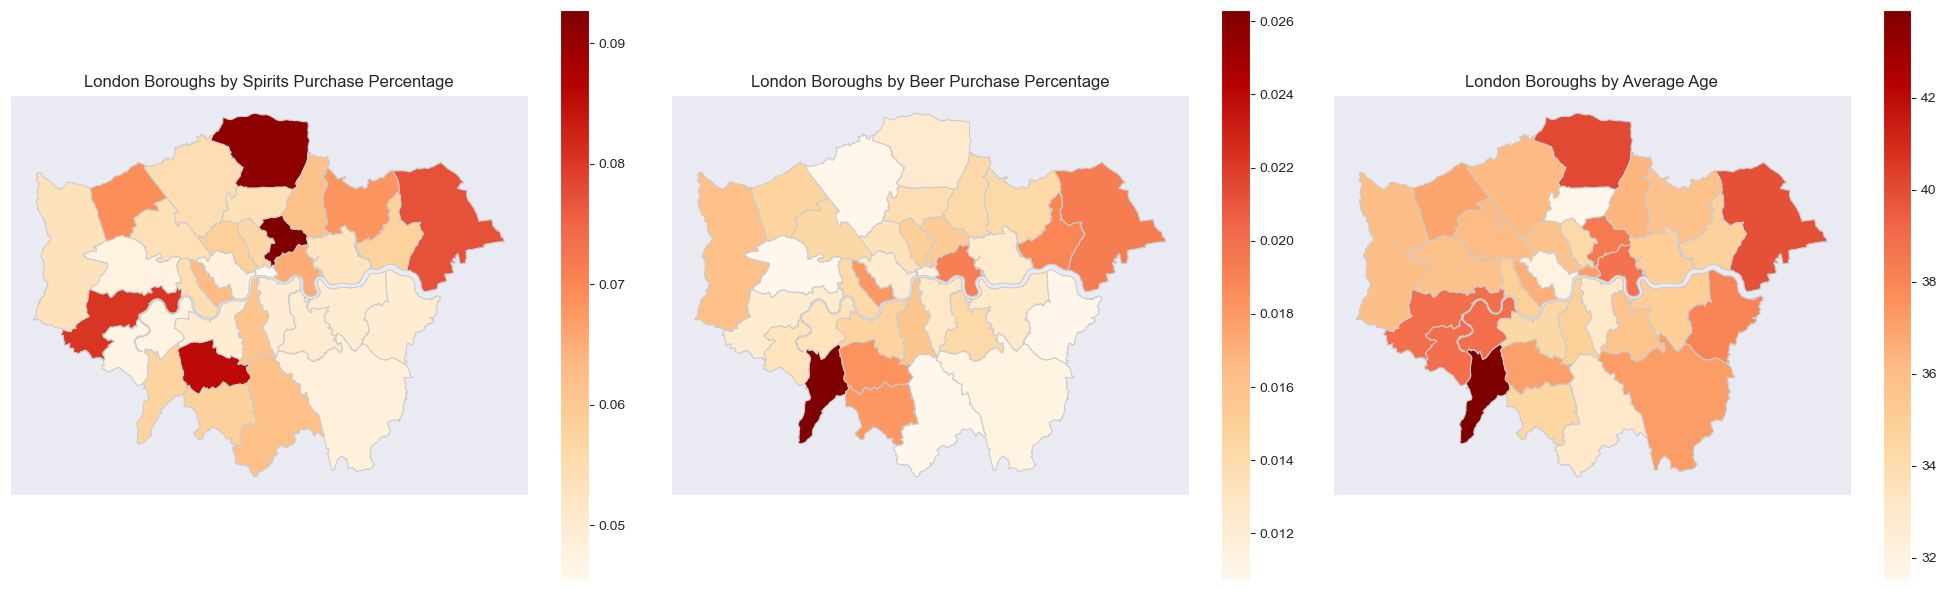

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the London boroughs shapefile
borough_shapes = gpd.read_file("london_boroughs_shapefile.shx")

# Merge the borough shapes with the Tesco data using the index
merged_data = borough_shapes.merge(tesco_data[['avg_age', 'f_readymade', 'f_beer']], left_index=True, right_index=True)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot for f_spirits
merged_data.plot(column='f_readymade', cmap='OrRd', linewidth=0.8, ax=axes[0], edgecolor='0.8', legend=True)
axes[0].set_title('London Boroughs by Spirits Purchase Percentage')
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].set_xlabel('')
axes[0].set_ylabel('')


# Plot for f_beer
merged_data.plot(column='f_beer', cmap='OrRd', linewidth=0.8, ax=axes[1], edgecolor='0.8', legend=True)
axes[1].set_title('London Boroughs by Beer Purchase Percentage')
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].set_xlabel('')
axes[1].set_ylabel('')

# Plot for avg_age
merged_data.plot(column='avg_age', cmap='OrRd', linewidth=0.8, ax=axes[2], edgecolor='0.8', legend=True)
axes[2].set_title('London Boroughs by Average Age')
axes[2].set_xticks([])
axes[2].set_yticks([])
axes[2].set_xlabel('')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

One can note it is difficult to gain any understanding.>>>

In [5]:
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

# Summary statistics
print("Summary statistics for avg_age:")
print(tesco_data['avg_age'].describe())

print("\nSummary statistics for f_spirits:")
print(tesco_data['f_spirits'].describe())

print("\nSummary statistics for f_beer:")
print(tesco_data['f_beer'].describe())

Summary statistics for avg_age:
count    33.000000
mean     36.253457
std       2.498356
min      31.514726
25%      34.858641
50%      35.934276
75%      37.195582
max      43.910124
Name: avg_age, dtype: float64

Summary statistics for f_spirits:
count    33.000000
mean      0.003261
std       0.000412
min       0.002437
25%       0.003032
50%       0.003298
75%       0.003580
max       0.003984
Name: f_spirits, dtype: float64

Summary statistics for f_beer:
count    33.000000
mean      0.014578
std       0.003322
min       0.010729
25%       0.012316
50%       0.014095
75%       0.015804
max       0.026307
Name: f_beer, dtype: float64


## Age vs Spirits

In [6]:
# Correlation analysis
corr_pearson, p_value_pearson = pearsonr(tesco_data['avg_age'], tesco_data['f_spirits'])
corr_spearman, p_value_spearman = spearmanr(tesco_data['avg_age'], tesco_data['f_spirits'])

print(f"\nPearson correlation coefficient: {corr_pearson:.2f}")
print(f"Pearson correlation p-value: {p_value_pearson:.4f}")

print(f"\nSpearman correlation coefficient: {corr_spearman:.2f}")
print(f"Spearman correlation p-value: {p_value_spearman:.4f}")


Pearson correlation coefficient: -0.26
Pearson correlation p-value: 0.1453

Spearman correlation coefficient: -0.43
Spearman correlation p-value: 0.0136


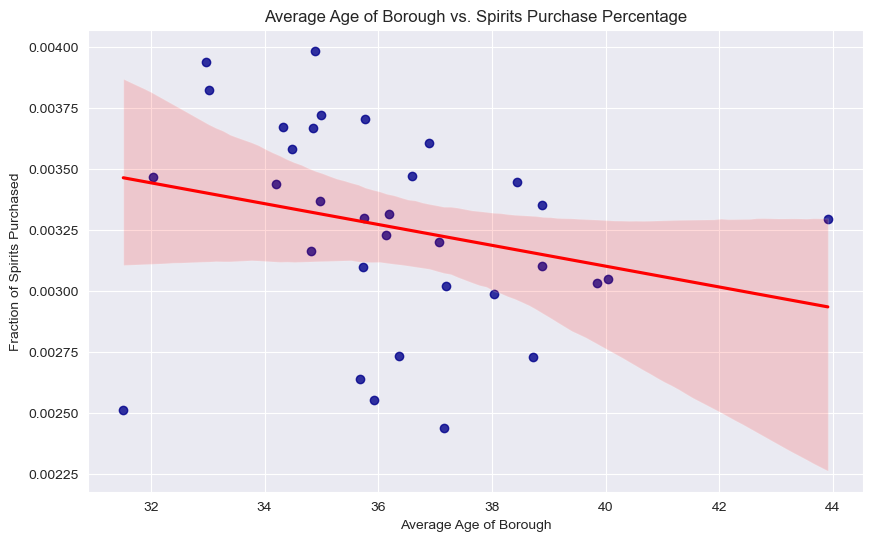

In [7]:
# Scatterplot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=tesco_data, x='avg_age', y='f_spirits', color='darkblue', line_kws={'color': 'red'})
plt.title('Average Age of Borough vs. Spirits Purchase Percentage')
plt.xlabel('Average Age of Borough')
plt.ylabel('Fraction of Spirits Purchased')
plt.show()

Interpretation:

## Age vs Beer

In [8]:
# Correlation analysis
corr_pearson, p_value_pearson = pearsonr(tesco_data['avg_age'], tesco_data['f_beer'])
corr_spearman, p_value_spearman = spearmanr(tesco_data['avg_age'], tesco_data['f_beer'])

print(f"\nPearson correlation coefficient: {corr_pearson:.2f}")
print(f"Pearson correlation p-value: {p_value_pearson:.4f}")

print(f"\nSpearman correlation coefficient: {corr_spearman:.2f}")
print(f"Spearman correlation p-value: {p_value_spearman:.4f}")


Pearson correlation coefficient: 0.45
Pearson correlation p-value: 0.0085

Spearman correlation coefficient: 0.12
Spearman correlation p-value: 0.4953


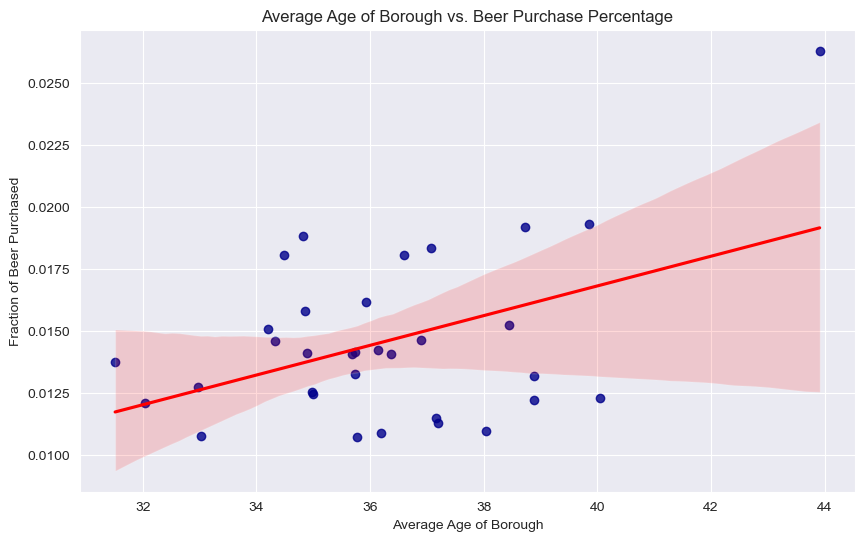

In [9]:
# Scatterplot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=tesco_data, x='avg_age', y='f_beer', color='darkblue', line_kws={'color': 'red'})
plt.title('Average Age of Borough vs. Beer Purchase Percentage')
plt.xlabel('Average Age of Borough')
plt.ylabel('Fraction of Beer Purchased')
plt.show()

### Task 3: Combing Datasets

In [13]:
# Read Excel file into a pandas DataFrame
earnings = pd.read_excel("earnings-residence-borough.xlsx", sheet_name="Total, weekly", usecols=46)

# Display the selected columns
print(earnings)

ValueError: Passing an integer for `usecols` is no longer supported.  Please pass in a list of int from 0 to `usecols` inclusive instead.

### Task 4: Presentation

### Task 5: Executive Summary